<a href="https://colab.research.google.com/github/carlos-ip/MTSI_PRACTICA_3/blob/main/MTSI_Practica_3_Munoz_Igual_Davalos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 3: Algoritmo de vecinos próximos

> Carlos Igual Pastor, Alfonso Muñoz García y Luis Felipe Dávalos  Martín



### En esta práctica evaluaremos 3 modelos distintos en un problema financiero
### Para ello seguiremos distintos pasos como son la búsqueda de una buena base de datos, análisis de la misma e implementación del algoritmo.

### Por último expondremos las conclusiones obtenidas.

# 1. Introducción y explicación de los import a introducir

In [ ]:
import numpy as np   #importar la biblioteca NumPy a su entorno actual.
import matplotlib.pyplot as plt #nos sirve para pintar las gráficas y otras funciones de representación.
import pandas as pd #  es un conjunto de herramientas de análisis de datos basado en Python.
import sklearn.datasets as datasets # Es un conjunto de herramientas para elementos de clasificación y de tipo multiclase.
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# 2. Búsqueda de las bases de datos

1.   Bitcoin
2.   Tron



Para encontrar las bases de datos hemos realizado una búsqueda por internet en distintas páginas como coinbase y kraken pero finalmente nos hemos inclinado por usar [finance.yahoo.com](https://es.finance.yahoo.com/) ya que nos ofrecía la posibilidad de descargar las cotizaciones en formato Excel y los datos en float y por lo tanto nos facilitaba el trabajo. En ambas bases de datos usaremos de fecha de inicio el día 31/12/2020 y fecha fin el día de hoy 26/05/2022.


1. Nuestra primera base de datos es en Bitcoin y su rango diario es entre 26.690,93 - 27.328,79€, su ticker es BTC.

2. La segunda base de datos es de Tron y su rango diario es entre 0,073276 - 0,077801€. su ticker de su criptomoneda es TRX.

## 2.1 Bitcoin

Bitcoin es una criptomoneda y un sistema descentralizado de pago en el cual los usuarios pueden transferir sus activos entre sí. 

Las transacciones de estos activos están verificadas por una red descentralizada de nodos en la cual se registran las transacciones  en blockchain.

In [ ]:
dataframe_bitcoin = pd.read_csv("/content/BTC-EUR.csv")
nd_bitcoin = dataframe_bitcoin.drop(['Date'],axis=1)
dataframe_bitcoin.tail(10)


,Date,Open,High,Low,Close,Adj Close,Volume
502,2022-05-17,28606.185547,29153.964844,28087.500000,28842.556641,28842.556641,27587090999
503,2022-05-18,28841.250000,28996.382813,27422.689453,27422.689453,27422.689453,29871799896
504,2022-05-19,27422.773438,28738.650391,27379.529297,28653.017578,28653.017578,31922561452
505,2022-05-20,28649.978516,28987.601563,27297.951172,27637.302734,27637.302734,29103029911
506,2022-05-21,27636.468750,28004.650391,27473.238281,27856.394531,27856.394531,16349928209
507,2022-05-22,27856.628906,28770.267578,27707.759766,28690.759766,28690.759766,20466652625
508,2022-05-23,28677.205078,28839.826172,27123.064453,27236.609375,27236.609375,29468544949
509,2022-05-24,27238.681641,27733.650391,26835.779297,27630.464844,27630.464844,24798918266
510,2022-05-25,27628.181641,28148.824219,27579.449219,27662.062500,27662.062500,25755724941
511,2022-05-26,27667.580078,27900.207031,27078.763672,27078.763672,27078.763672,28985991168


### A continuación, nos dedicaremos a analizar la base de datos:

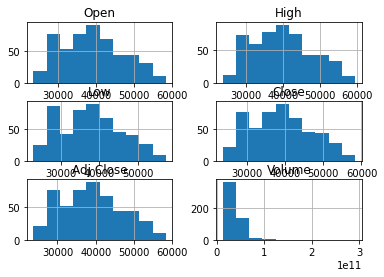

In [ ]:
dataframe_bitcoin.hist(stacked=True)
plt.show()

## 2.2 Tron

Tron posee una plataforma para ejecutar smart contracts y también posee su propia criptomoneda.


In [ ]:
dataframe_tron = pd.read_csv("/content/TRX-EUR.csv")
nd_trx = dataframe_tron.drop(['Date'],axis=1)
dataframe_tron.tail(10)


,Date,Open,High,Low,Close,Adj Close,Volume
503,2022-05-18,0.068517,0.068880,0.066275,0.067768,0.067768,842725055
504,2022-05-19,0.067771,0.070404,0.066990,0.069574,0.069574,968241325
505,2022-05-20,0.069576,0.070860,0.066591,0.067531,0.067531,972894134
506,2022-05-21,0.067534,0.071395,0.066827,0.070104,0.070104,722020087
507,2022-05-22,0.070105,0.074134,0.069741,0.073923,0.073923,845286445
508,2022-05-23,0.073921,0.076947,0.071198,0.071400,0.071400,1212408025
509,2022-05-24,0.071399,0.077034,0.071374,0.075102,0.075102,1376642337
510,2022-05-25,0.075092,0.080478,0.075308,0.079190,0.079190,1290553446
511,2022-05-26,0.079223,0.080583,0.074376,0.076746,0.076746,1748488615
512,2022-05-27,0.076662,0.077801,0.073276,0.077414,0.077414,1704512512


### A continuación, nos dedicaremos a analizar la base de datos:

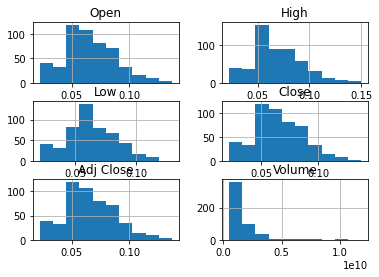

In [ ]:
dataframe_tron.hist(stacked=True)
plt.show()

# 3. Algoritmo k-nn

## 3.1 Bitcoin

### 3.1.1 Implementación del algoritmo en Bitcoin

In [ ]:
X_btc=nd_bitcoin.drop('Adj Close',axis=1)
Y_btc=nd_bitcoin['Adj Close'].values

In [ ]:
dataframe_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       512 non-null    object 
 1   Open       512 non-null    float64
 2   High       512 non-null    float64
 3   Low        512 non-null    float64
 4   Close      512 non-null    float64
 5   Adj Close  512 non-null    float64
 6   Volume     512 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 28.1+ KB


### 3.1.2 Separación de datos en entrenamiento y test para Bitcoin

In [ ]:
X_train_btc, X_test_btc, Y_train_btc, Y_test_btc = train_test_split(X_btc, Y_btc,random_state=0)
print("Ejemplos usados para entrenar: ", len(X_train_btc))
print("Ejemplos usados para test: ", len(X_test_btc))


Ejemplos usados para entrenar:  384
Ejemplos usados para test:  128


### 3.1.3 Construcción del modelo para Bitcoin

In [ ]:
reg_btc = KNeighborsRegressor(n_neighbors=10)
reg_btc.fit(X_train_btc, Y_train_btc)
reg_btc.predict(X_test_btc)
reg_btc.score(X_test_btc, Y_test_btc)

0.038573514431627265

## 3.2 Tron

### 3.2.1 Implementación del algoritmo en Tron

---



In [ ]:
X_trx=nd_trx.drop('Adj Close',axis=1)
Y_trx=nd_trx['Adj Close'].values

### 3.2.2 Separación de datos en entrenamiento y test para Tron

In [ ]:
X_train_trx, X_test_trx, Y_train_trx, Y_test_trx = train_test_split(X_trx, Y_trx, random_state=0)
print("Ejemplos usados para entrenar: ", len(X_train_trx))
print("Ejemplos usados para test: ", len(X_test_trx))


Ejemplos usados para entrenar:  384
Ejemplos usados para test:  129


### 3.2.3 Construcción del modelo para Tron

In [ ]:
reg_trx = KNeighborsRegressor(n_neighbors=10)
reg_trx.fit(X_train_trx, Y_train_trx)
reg_trx.predict(X_test_trx)
reg_trx.score(X_test_trx, Y_test_trx)

0.2592513115001338

## 3.4 Encontrar el mejor 'K' 



### 3.4.1 Encontrar el mejor 'K' en Bitcoin

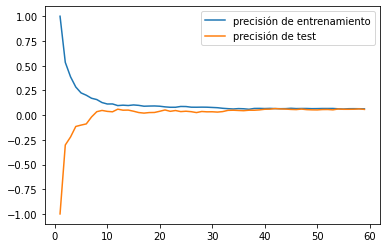

In [ ]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 60.
neighbors_settings = range(1, 60)
for n_neighbors in neighbors_settings:
    # build the model
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train_btc, Y_train_btc)
    # record training set accuracy
    training_accuracy.append(reg.score(X_train_btc, Y_train_btc))  
    # record generalization accuracy
    test_accuracy.append(reg.score(X_test_btc, Y_test_btc))
plt.plot(neighbors_settings, training_accuracy, label="precisión de entrenamiento")
plt.plot(neighbors_settings, test_accuracy, label="precisión de test")
plt.legend()

### 3.4.2 Encontrar el mejor 'K' en Tron

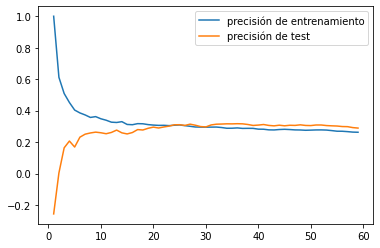

In [ ]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 60.
neighbors_settings = range(1,60)
for n_neighbors in neighbors_settings:
    # build the model
    reg2 = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg2.fit(X_train_trx, Y_train_trx)
    # record training set accuracy
    training_accuracy.append(reg2.score(X_train_trx, Y_train_trx))  
    # record generalization accuracy
    test_accuracy.append(reg2.score(X_test_trx, Y_test_trx))
plt.plot(neighbors_settings, training_accuracy, label="precisión de entrenamiento")
plt.plot(neighbors_settings, test_accuracy, label="precisión de test")
plt.legend()

## 3.5 Fiabilidad mejorada del algoritmo


### 3.5.1 Fiabilidad mejorada para Bitcoin

In [ ]:
reg2_btc = KNeighborsRegressor(n_neighbors=42)
reg2_btc.fit(X_train_btc, Y_train_btc)
reg2_btc.predict(X_test_btc)
reg2_btc.score(X_test_btc, Y_test_btc)

0.06677828440239564

### 3.5.2 Fiabilidad mejorada para Tron

In [ ]:
reg2_trx = KNeighborsRegressor(n_neighbors=50)
reg2_trx.fit(X_train_trx, Y_train_trx)
reg2_trx.predict(X_test_trx)
reg2_trx.score(X_test_trx, Y_test_trx)

0.3049662357175831

## 3.6 Predicción para el día siguiente:

**Para predecir el valor del bitcoin al día siguiente, usaremos el valor de cierre del día anterior.**

In [ ]:
nd_bitcoin2 = dataframe_bitcoin.drop(['Date', 'Adj Close'],axis=1)
ult= nd_bitcoin2.tail(50)
reg2_btc.predict(ult)

array([38260.19549862, 38347.03571443, 34539.44559167, 34329.42345626,
       39685.3644439 , 39010.82254476, 38910.92150314, 38039.74934902,
       35831.64950719, 34539.44559167, 34154.16066795, 40302.48051533,
       38710.58789071, 39649.53111064, 40258.521345  , 39364.27060098,
       34539.44559167, 34329.42345626, 41170.84291307, 40258.521345  ,
       38980.99423374, 40405.01316048, 38980.99423374, 38039.74934902,
       39649.53111064, 40181.65462248, 39364.27060098, 42167.69647524,
       40668.865374  , 41109.52692538, 38470.29622405, 41921.79687519,
       37679.59547067, 39571.43410533, 37978.93247774, 38294.80031629,
       39986.78045957, 39510.02529776, 38479.61672262, 40302.48051533,
       39814.95382267, 39208.584682  , 40590.928246  , 38957.25864969,
       34329.42345626, 36125.97781819, 39386.75837062, 38424.2539994 ,
       39649.53111064, 38957.25864969])

**Para predecir el valor de tron al día siguiente, usaremos el valor de cierre del día anterior.**

In [ ]:
nd_tron2 = dataframe_tron.drop(['Date', 'Adj Close' ],axis=1)
ult= nd_tron2.tail(1)
reg2_trx.predict(ult)

array([0.06655218])

**¿Por qué nos da este valor?**

Haremos algunas funciones para explicar esto:

In [ ]:
muestra=nd_trx['Adj Close'].values
media= sum(muestra)/len(muestra)
print("media: ", media)

media:  0.06579315789473689


In [ ]:
def square(muestra):
    """Función que calcula los cuadrados de una lista de números.
    """
    list = []
    for i in muestra:
        list.append(i**2)
    return list

In [ ]:
varianza= sum(square(muestra))/len(muestra)-media**2
print("varianza: ", varianza)

varianza:  0.0004770521112362732


In [ ]:
desviacion_tipica= varianza**0.5
print("desviación típica: ", desviacion_tipica)

desviación típica:  0.021841522640060448


## 3.7 Posibles mejoras de la predicción:

### 3.7.1 Twitter, Google y APIs.



Habiendo estudiado el mercado de las criptomonedas podemos decir que es un mercado muy volátil en el cúal la gente "decide" sobre su precio. 

Twitter es un buen ejemplo de ello ya que existen personas con bastantes seguidores capaces con un solo tweet de aumentar o reducir drásticamente el valor de una criptomoneda.

Existen APIs las cuáles nos ayudan a recoger estos datos. Otras herramientas podrían ser Google Developers o Twitter Developers.

Pudiendo conseguir un algoritmo en el cuál se recojan datos de los tweets en la última hora acerca del tema "Bitcoin" o "Cardano", podremos intentar predecir si esa moneda podrá bajar o subir.

### 3.7.2 Ballenas. 


Otro de los factores por los que es muy dificil predecir alguna criptomoneda es las ballenas.

Las ballenas son unos pocos inversores los cuáles tienen grandes cantidades de esa criptomoneda por lo tanto cualquier movimiento puede mover el mercado.

Intentar predecir cuando una ballena se moverá puede ser de gran ayuda para poder vender los activos de esa criptomoneda y poder ganar o no perder.

# 4. Algoritmo de Arboles

4.1 Bitcoin 

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz 
import graphviz
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
predictors = dataframe_bitcoin[['Open','High','Low','Close','Adj Close',	'Volume']]
targets = dataframe_bitcoin.Close
predictors

,Open,High,Low,Close,Adj Close,Volume
0,23451.113281,23781.845703,22979.406250,23741.736328,23741.736328,38275110384
1,23735.423828,24316.916016,23649.960938,24165.556641,24165.556641,33508045052
2,24167.451172,27321.906250,23972.966797,26474.892578,26474.892578,55925382232
3,26476.656250,28519.630859,26413.128906,26760.720703,26760.720703,64216240796
4,26784.332031,27294.240234,23363.980469,26094.005859,26094.005859,66241895056
...,...,...,...,...,...,...
507,27856.628906,28770.267578,27707.759766,28690.759766,28690.759766,20466652625
508,28677.205078,28839.826172,27123.064453,27236.609375,27236.609375,29468544949
509,27238.681641,27733.650391,26835.779297,27630.464844,27630.464844,24798918266
510,27628.181641,28148.824219,27579.449219,27662.062500,27662.062500,25755724941


In [ ]:
predictors_labels=['Open','High','Low','Close','Adj Close',	'Volume']


In [ ]:
X_entrenamiento,X_test,y_entrenamiento,y_test=train_test_split(predictors,targets)

In [ ]:
arbol=DecisionTreeRegressor()
arbol.fit(X_entrenamiento,y_entrenamiento)

DecisionTreeRegressor()

In [ ]:
Y_prediccion = arbol.predict(X_test)


In [ ]:
X_grid = np.arange(min(X_test), max(X_test), 1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test)
plt.plot(X_grid, arbol.predict(X_grid), color='red', linewidth=3)

TypeError: ignored

# 5. Algoritmo RNA

##5.1 Bitcoin

###5.1.1 Imports


In [ ]:
import tensorflow as tf
import numpy as np

###5.1.2 Definición de entradas y salidas

In [ ]:
entrada=nd_bitcoin['Open'].values
salida=nd_bitcoin['Close'].values

###5.1.3 Definición de capas y modelo

In [ ]:
#capa=tf.keras.layers.Dense(units=1,input_shape=[1])
#modelo=tf.keras.Sequential([capa])
oculta1=tf.keras.layers.Dense(units=3,input_shape=[1])
oculta2=tf.keras.layers.Dense(units=3)
capa_salida=tf.keras.layers.Dense(units=1)
modelo=tf.keras.Sequential([oculta1,oculta2,capa_salida])
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(1), 
    loss='mean_squared_error'
)

###5.1.4 Separación de valores de entrenamiento y test

In [ ]:
entrada_train,entrada_test,salida_train,salida_test = train_test_split(entrada, salida, random_state=0)
print("Ejemplos usados para entrenar: ", len(entrada_train))
print("Ejemplos usados para test: ", len(entrada_test))


###5.1.5 Entrenamiento del modelo

In [ ]:
historial=modelo.fit(entrada_train,salida_train,epochs=50,verbose=False)
plt.xlabel("ronda")
plt.ylabel("magnitud de perdida")
plt.plot(historial.history["loss"])

###5.1.6 Variables internas del modelo

In [ ]:
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(capa_salida.get_weights())

###5.1.7 Prueba de predicción

In [ ]:
resultado=modelo.predict([28606.185547])
print(resultado)

##5.2 Tron

###5.2.1 Definición de entradas y salidas


In [ ]:
entradat=nd_trx['Open'].values
salidat=nd_trx['Close'].values

###5.2.2 Definición de capas del modelo

In [ ]:
#capa=tf.keras.layers.Dense(units=1,input_shape=[1])
#modelo=tf.keras.Sequential([capa])
oculta1t=tf.keras.layers.Dense(units=3,input_shape=[1])
oculta2t=tf.keras.layers.Dense(units=3)
capa_salidat=tf.keras.layers.Dense(units=1)
modelot=tf.keras.Sequential([oculta1t,oculta2t,capa_salidat])
modelot.compile(
    optimizer=tf.keras.optimizers.Adam(0.001), 
    loss='mean_squared_error'
)

###5.2.3 Separación de valores de entrenamiento y test

In [ ]:
entrada_traint,entrada_testt,salida_traint,salida_testt = train_test_split(entradat, salidat, random_state=0)
print("Ejemplos usados para entrenar: ", len(entrada_traint))
print("Ejemplos usados para test: ", len(entrada_testt))


###5.2.4 Entrenamiento del modelo

In [ ]:
historialt=modelot.fit(entrada_traint,salida_traint,epochs=500,verbose=False)
plt.xlabel("ronda")
plt.ylabel("magnitud de perdida")
plt.plot(historialt.history["loss"])

###5.2.5 Variables internas del modelo

In [ ]:
#print(capa.get_weights())
print(oculta1t.get_weights())
print(oculta2t.get_weights())
print(capa_salidat.get_weights())

###5.2.6 Prueba de predicción

In [ ]:
resultadot=modelot.predict([0.068517])
print(resultadot)

##5.3 Resumen y observaciones
A continuación vamos a resumir lo realizado durante este algoritmo:
Como podemos observar, comenzamos aportándole al mismo los valores de las entradas y las salidad para poder entrenarlo. Después definimos el modelo, tras varias pruebas con modelos de diferentes capas ocultas nos decantamos por dos capas mononeuronales(entrada y salida) y dos capas ocultas con 3 neuronas cada una de ellas. A continuación creamos el modelo y lo compilamos añadiendo el optimizador y la función de pérdida que en nuestro caso seleccionamos el error cuadrático medio. Separamos los datos de entrenamiento y test, y realizamos el entrenamiento con los datos seleccionados y un numero determinado de veces que va a realizar el entrenamiento con la lista de valores d enetrada y salida. En este caso cambia para cada modelo ya que cada uno de ellos tiene unas necesidades diferentes. Esto se debe a la función de ajuste, que debe ser coherente a los datos (Si los datos varían en 1000 de un día para otro en bitcoin y 0.1 en Tron no podemos utilizar ni las mimsmas rondas ni el mismo valor de ajuste, por ejemplo en tron es 0.01). Por último añadimos una muestra de la variación de valores que se ha realizado en el entrenamiento ajustando los pesos de cada capa y cada neurona y realizamos una prueba de rendimiento para ver si hemos ajustado correctamente nuestros modelos.